# Task 1: Exploratory Data Analysis (EDA) for BBC Text Classification
This notebook performs EDA on the BBC news classification dataset (`train.csv`, `test.csv`) for binary classification between **Tech (T)** and **Entertainment (E)**.


## Task 1 A

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
print(sklearn.__version__)
# Load CSV files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Combine datasets for EDA purposes
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Preview the dataset
full_df.head()



1.6.1


,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment


In [25]:
vectorizer = TfidfVectorizer()

# Step 1: Identify Unique words
vectorizer.fit(full_df['Text'])
print(f'Vector vocabulary size: {len(vectorizer.vocabulary_)}')
print(f'Sample vocabulary: {list(vectorizer.vocabulary_.keys())[:10]}\n')

# Step 2: Encode documents
X = vectorizer.transform(full_df['Text'])
feature_names = vectorizer.get_feature_names_out()

print(f'Features (first 10): {feature_names[:10]}\n')

# Summarize encoded vector
print(f'Vector shape: {X.shape}')
print(f'Number of articles: {X.shape[0]}')
print(f'Number of extracted features: {X.shape[1]}\n')

# Show 5 example articles with their extracted features
print("5 example articles with their extracted features:")
df_features = pd.DataFrame(X[:5].toarray(), columns=feature_names)
df_features.head()

Vector vocabulary size: 14927
Sample vocabulary: ['lifestyle', 'governs', 'mobile', 'choice', 'faster', 'better', 'funkier', 'hardware', 'alone', 'going']

Features (first 10): ['00' '000' '000th' '001st' '0051' '007' '0100' '0130' '028' '0400']

Vector shape: (534, 14927)
Number of articles: 534
Number of extracted features: 14927

5 example articles with their extracted features:


,00,000,000th,001st,0051,007,0100,0130,028,0400,...,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro,zutons
0,0.0,0.020253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056233,0.0,0.0


## Task 1 B

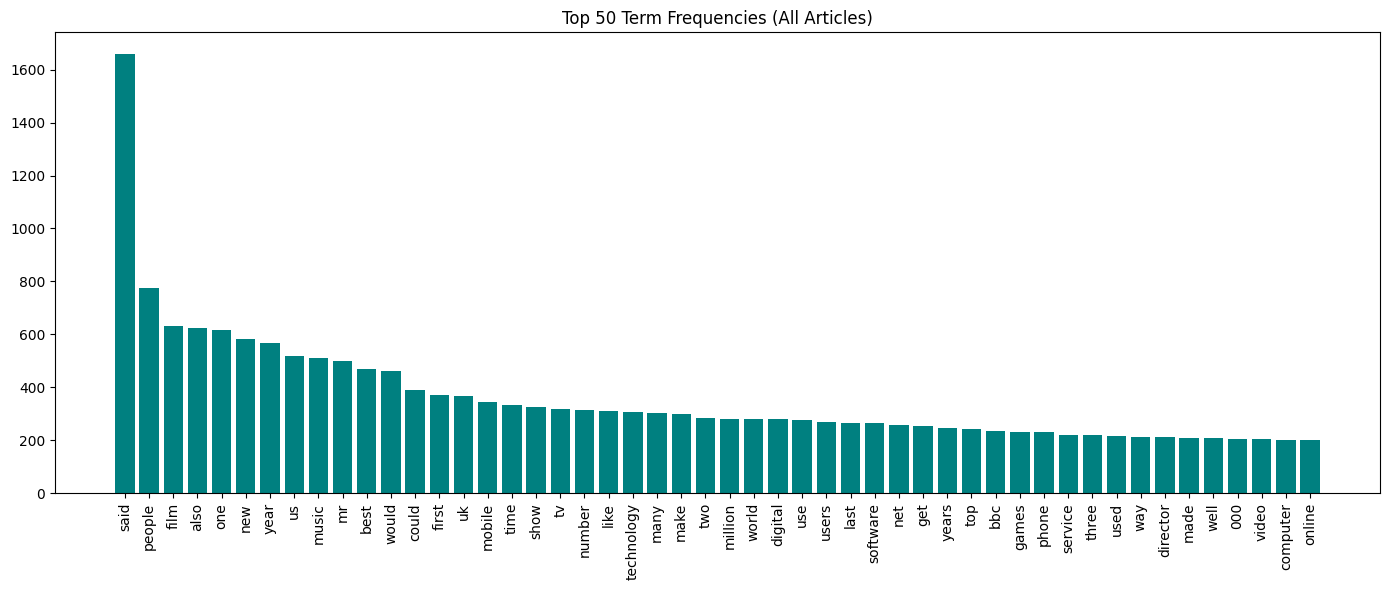

In [15]:
# Compute total frequency across all docs
term_frequencies = np.asarray(X.sum(axis=0)).flatten()

# Top 50 terms
top_indices = term_frequencies.argsort()[::-1][:50]
top_terms = [feature_names[i] for i in top_indices]
top_counts = term_frequencies[top_indices]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(top_terms, top_counts, color='teal')
plt.title("Top 50 Term Frequencies (All Articles)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


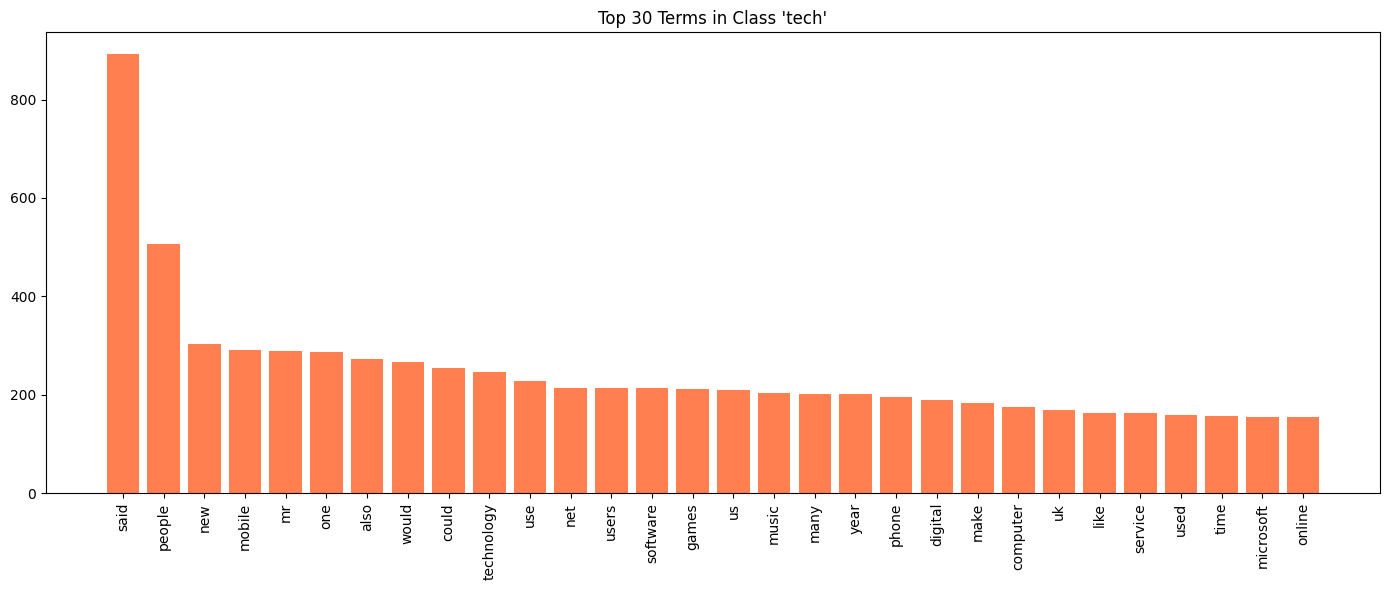

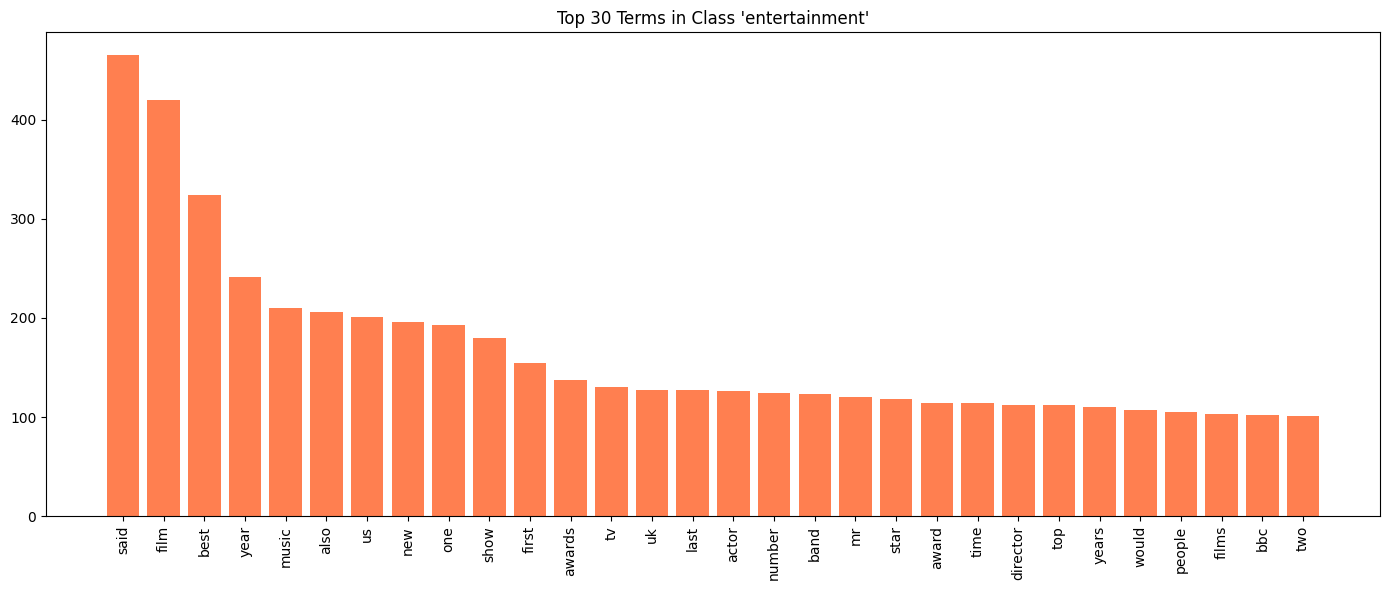

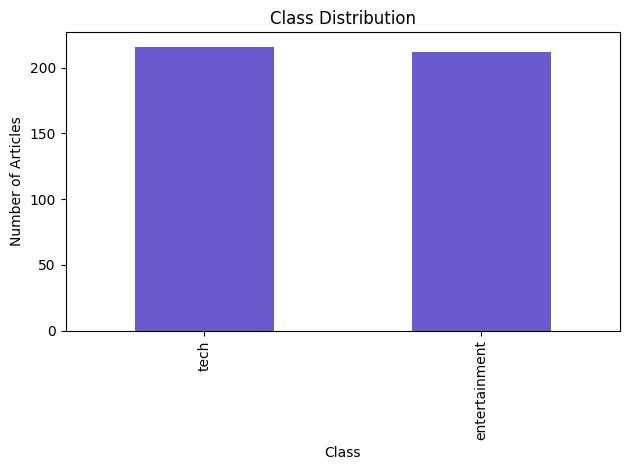

In [21]:
category = train_df['Category'].unique()

for cat in category:
    class_docs = train_df[train_df['Category'] == cat]['Text']
    class_X = vectorizer.transform(class_docs)
    class_freq = np.asarray(class_X.sum(axis=0)).flatten()
    
    top_class_indices = class_freq.argsort()[::-1][:30]
    top_class_terms = [feature_names[i] for i in top_class_indices]
    top_class_counts = class_freq[top_class_indices]
    
    plt.figure(figsize=(14, 6))
    plt.bar(top_class_terms, top_class_counts, color='coral')
    plt.title(f"Top 30 Terms in Class '{cat}'")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


train_df['Category'].value_counts().plot(kind='bar', color='slateblue', title='Class Distribution')
plt.xlabel("Class")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()
 
